In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import re
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from collections import Counter
from google_drive_downloader import GoogleDriveDownloader as gdd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
gdd.download_file_from_google_drive(file_id='14TaFIFoslOAAljV2uj5rU9biAuocKScX', dest_path= '/LargeMovieReviewDataset.csv')

In [ ]:
data = pd.read_csv('/LargeMovieReviewDataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
target = data.sentiment

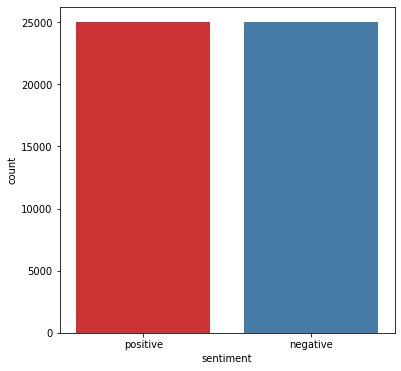

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
ax = sns.countplot(x = data["sentiment"], palette="Set1")  
plt.show()

target.value_counts()

The dataset is balanced

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Not all reviews are unique which means that some of them are doubled or something 

In [ ]:
#Convert sentiment columns into nnumerical features
data.sentiment = data.sentiment.apply(lambda x: 1 if x == 'positive' else 0)
target = data.sentiment

In [ ]:
#To see what we need to clear let's take a look at one review
review = data.review.loc[1]
review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

There are some html contents,   '/',   ')' and etc to clean. Then I do stemming or lemmatization (We'll see what works better). Then remove stopwords (I do it after stemming or lemmatization to be convinced that stopwords will definitely remove). After that I'll do embedding. 

Firstly, I do it on one review to compare methods





In [ ]:
#Remove html tags
soup = BeautifulSoup(review, 'html.parser')
review = soup.get_text()
review

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [ ]:
#Using Regular Expressions remove everything except lower/upper case letters
review = re.sub('\[[^]]*\]', ' ', review)
review = re.sub('[^a-zA-Z]', ' ', review)
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [ ]:
#Make all lowercase
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [ ]:
#Stemming function
def Porter(text):
    ps = PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
    
review_stem = Porter(review)
review_stem

'a wonder littl product the film techniqu is veri unassum veri old time bbc fashion and give a comfort and sometim discomfort sens of realism to the entir piec the actor are extrem well chosen michael sheen not onli ha got all the polari but he ha all the voic down pat too you can truli see the seamless edit guid by the refer to william diari entri not onli is it well worth the watch but it is a terrificli written and perform piec a master product about one of the great master s of comedi and hi life the realism realli come home with the littl thing the fantasi of the guard which rather than use the tradit dream techniqu remain solid then disappear it play on our knowledg and our sens particularli with the scene concern orton and halliwel and the set particularli of their flat with halliwel s mural decor everi surfac are terribl well done'

In [ ]:
def WordNetLem(text):
    lem = WordNetLemmatizer()
    text= ' '.join([lem.lemmatize(word) for word in text.split()])
    return text

review_lem = WordNetLem(review)
review_lem

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and give a comforting and sometimes discomforting sense of realism to the entire piece the actor are extremely well chosen michael sheen not only ha got all the polari but he ha all the voice down pat too you can truly see the seamless editing guided by the reference to williams diary entry not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really come home with the little thing the fantasy of the guard which rather than use the traditional dream technique remains solid then disappears it play on our knowledge and our sens particularly with the scene concerning orton and halliwell and the set particularly of their flat with halliwell s mural decorating every surface are terribly well done'

I can see that some words like very became veri after stemming, but stayed the same after lemmatization. I think I should use Lemmatization because of that.

In [ ]:
tokenizer = ToktokTokenizer()

def stopwords_remove(text):
    tokens = tokenizer.tokenize(text)
    text = [word for word in tokens if not word in set(stopwords.words('english'))]
    filtered_text = ' '.join(text)    
    return filtered_text
review_lem = stopwords_remove(review_lem)
review_lem

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen ha got polari ha voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

Yeah, articles and other stopwords have removed. Now let's do the same on whole dataset 

In [ ]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(data['review'], target, test_size=0.25, random_state=42)

In [ ]:
#Cleaning and appending to train and test corpus
corpus_train = []
corpus_test  = []

for i in range(X_train.shape[0]):
    soup = BeautifulSoup(X_train.iloc[i], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = WordNetLem(review)
    review = stopwords_remove(review)
    corpus_train.append(review)

for j in range(X_test.shape[0]):
    soup = BeautifulSoup(X_test.iloc[j], "html.parser")
    review = soup.get_text()
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = WordNetLem(review)
    review = stopwords_remove(review)
    corpus_test.append(review)

In [ ]:
corpus_train[7]

'production value video poor unwatchable performance took second place overwhelmingly creative hijinks studio wank thirty special effect per minute filmed cloud smoke one two second duration per shot frequently background spotlight shine directly camera lighting wa terrible filming constant zooming total lack visual continuity may good dancing available live audience video viewer never know'

In [ ]:
corpus_test[7]

'okay get purgatory thing first time watched episode seemed like something significant wa going put finger time costa mesa fire tv really caught attention helped wa writing essay inferno let see discussed yet twop review mentioned tony flight stair go broken elevator yeah significant number lot reason especially religious one ya hunch consulted wikipedia guess dante divided level purgatorio excluding ante purgatory paradise stuff bottom stair tony get allegedly random monk slap scene soon monk appeared fit perfectly place tony trying get purgatory tell got worried christian commercial death disease sin came getting desperate christian heaven looking kinda iffy time meet monk thinking hey maybe guy help sound like contemplating religion e g buddhism wondering path could take salvation tony necessarily literally thinking becoming buddhist appears finnerty tried messed slap face basically tell tony quick fix suddenly embrace buddhism get tony wa initially concerned getting heaven conferen

Okay, everything works, let's keep going

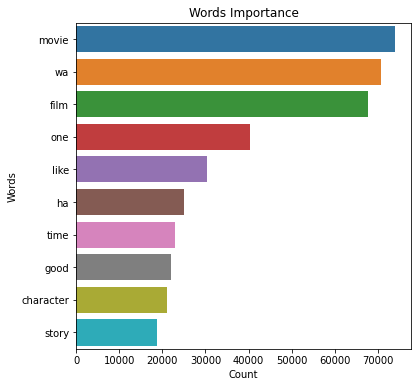

In [ ]:
#Visualizing the most important words 
counter=Counter(str(corpus_train).split())
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.title('Words Importance')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

This words will be the heaviest in making model solution

In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))

tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)

**SVM**

In [ ]:
tuned_parameters = [{'clf__kernel': ['rbf'], 'clf__gamma': [1e-3, 1e-4],
                     'clf__C': [1, 10, 100, 1000]},]

In [ ]:
my_pipeline_1 = Pipeline([('clf', SVC())])


parameters = {'clf__C': [0.05, 0.1, 1, 5]}

grid_search = GridSearchCV(my_pipeline_1, param_grid=tuned_parameters,
                           cv=StratifiedKFold(3), scoring='f1', verbose=2)


In [ ]:
grid_search.fit(tfidf_vec_train, Y_train) 

In [ ]:
grid_search.best_params_

In [ ]:
SVM_probs =  grid_search.predict_proba(tfidf_vec_test)             

In [ ]:
y_pred_SVM = grid_search.predict(tfidf_vec_test)

In [ ]:
print(classification_report(Y_test, y_pred_SVM))

**NAIVE BAYES**

In [ ]:
tuned_parameters_1 = [{'clf__alpha': [0, 0.5, 1.0, 5, 10], 'clf__fit_prior':[True, False]}]

In [ ]:
my_pipeline_2 = Pipeline([('clf', MultinomialNB())])

grid_search = GridSearchCV(my_pipeline_2, param_grid=tuned_parameters_1,
                           cv=StratifiedKFold(3), scoring='f1', verbose=2)


In [ ]:
grid_search.fit(tfidf_vec_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] clf__alpha=0, clf__fit_prior=True ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ clf__alpha=0, clf__fit_prior=True, total=   0.9s
[CV] clf__alpha=0, clf__fit_prior=True ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................ clf__alpha=0, clf__fit_prior=True, total=   0.8s
[CV] clf__alpha=0, clf__fit_prior=True ...............................
[CV] ................ clf__alpha=0, clf__fit_prior=True, total=   0.8s
[CV] clf__alpha=0, clf__fit_prior=False ..............................
[CV] ............... clf__alpha=0, clf__fit_prior=False, total=   0.7s
[CV] clf__alpha=0, clf__fit_prior=False ..............................
[CV] ............... clf__alpha=0, clf__fit_prior=False, total=   0.7s
[CV] clf__alpha=0, clf__fit_prior=False ..............................
[CV] ............... clf__alpha=0, clf__fit_prior=False, total=   0.7s
[CV] clf__alpha=0.5, clf__fit_prior=True .............................
[CV] .............. clf__alpha=0.5, clf__fit_prior=True, total=   0.8s
[CV] clf__alpha=0.5, clf__fit_prior=True .............................
[CV] .............. clf__alpha=0.5, clf__fit_prior=True, total=   0.8s
[CV] clf__alpha=0.5, clf__fit_prior=True .............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        MultinomialNB(alpha=1.0,
                                                      class_prior=None,
                                                      fit_prior=True))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'clf__alpha': [0, 0.5, 1.0, 5, 10],
                          'clf__fit_prior': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [ ]:
grid_search.best_params_

{'clf__alpha': 0.5, 'clf__fit_prior': False}

In [ ]:
y_pred_NB = grid_search.predict(tfidf_vec_test)

In [ ]:
nb_probs =  grid_search.predict_proba(tfidf_vec_test)             

In [ ]:
print(classification_report(Y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6157
           1       0.90      0.89      0.90      6343

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



**SGDClassifier**

In [ ]:
tuned_parameters_2 = [{'clf__alpha':[0.0001, 0.00001], 'clf__penalty': ['l2', 'l1', 'elasticnet'], 'clf__loss' : ["modified_huber"]}]

In [ ]:
my_pipeline_3 = Pipeline([('clf', SGDClassifier())])

grid_search = GridSearchCV(my_pipeline_3, param_grid=tuned_parameters_2,
                           cv=StratifiedKFold(3), scoring='f1', verbose=2)

In [ ]:
grid_search.fit(tfidf_vec_train, Y_train)

In [ ]:
grid_search.best_params_

{'clf__alpha': 1e-05,
 'clf__loss': 'modified_huber',
 'clf__penalty': 'elasticnet'}

In [ ]:
y_pred_SGD = grid_search.predict(tfidf_vec_test)

In [ ]:
sgd_probs =  grid_search.predict_proba(tfidf_vec_test)           

array([[0.86640936, 0.13359064],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.99256245, 0.00743755],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
print(classification_report(Y_test, y_pred_SGD))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6157
           1       0.90      0.93      0.91      6343

    accuracy                           0.91     12500
   macro avg       0.91      0.91      0.91     12500
weighted avg       0.91      0.91      0.91     12500



Roc-auc

In [ ]:
nb_auc = roc_auc_score(Y_test, nb_probs)
svm_auc = roc_auc_score(Y_test, svm_probs)
sgd_auc = roc_auc_score(Y_test, sgd_probs) #Error: bad input shape (12500, 2). I don't know how to fix it

ValueError: ignored

In [ ]:
print('naive bayes aucroc score', nb_auc)
print('svm aucroc score: ', svm_auc)
#print('sgd aucroc score', sgd_auc)

naive bayes aucroc score 0.9653039850026569


In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_probs)
#sgd_fpr, sgd_tpr, _ = roc_curve(Y_test, sgd_probs)

In [ ]:
plt.plot(nb_fpr, nb_tpr, linestyle= '--', label = 'Naive Bayes prediction (AUCROC = %0.3f)'%nb_auc)
plt.plot(svm_fpr, svm_tpr, linestyle= '--', label = 'SVM prediction (AUCROC = %0.3f)'%svm_auc)
#plt.plot(sgd_fpr, sgd_fpr, linestyle= '--', label = 'SGD prediction (AUCROC = %0.3f)'%sgd_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.legend()
plt.show()

In [ ]:
import numpy as np 
A = np.array([1, 2, 3])
B = np.array([8, 9, 10])
np.linalg.norm(A-B)

12.12435565298214

**Conclusion**


With the help of the roc curve and roc auc score, we can see naive bayes model worked great.

*That's all. Have a great day !*